In [2]:
import os
import glob
import altair as alt
import pandas as pd
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)

In [3]:
week = 4
team = "Chicago Bears"
team_city = "Chicago"
team_underscore = "_".join(team.lower().split(" "))

team_opp = "New York Giants"
team_opp_alt = "NY Giants"
team_city_opp = "New York"
team_opp_underscore = "_".join(team_opp.lower().split(" "))

team_date = "20220927"
player_date = "20220927"
nfl_date = "20220927"

# bears
# background etc.
primary_color = "#0B162A" 
secondary_color = "#C83803"

opp_primary_color = "#0B2265"
opp_secondary_color = "#A71930"

In [4]:
cols = ["Date", "Opponent", "Result", "W/L", "Div", "Spread", "Total", "Money"]
df_schedule = pd.read_csv(f"../data/team_ranks/_nfl_team_{team_underscore}__{team_date}.csv")
df_schedule["Opponent"] = np.where(df_schedule.Location.eq("Away"), "@" + df_schedule.Opponent, df_schedule.Opponent)
record_str = df_schedule[~df_schedule.Div.isnull()].iloc[-1]["W/L"]

In [5]:
df_schedule = df_schedule.fillna("")
df_schedule = df_schedule.head(n=7)[cols]

df_schedule_opp = pd.read_csv(f"../data/team_ranks/_nfl_team_{team_opp_underscore}__{team_date}.csv")
df_schedule_opp["Opponent"] = np.where(df_schedule_opp.Location.eq("Away"), "@" + df_schedule_opp.Opponent, df_schedule_opp.Opponent)
record_opp_str = df_schedule_opp[~df_schedule_opp.Div.isnull()].iloc[-1]["W/L"]

df_schedule_opp = df_schedule_opp.fillna("")
df_schedule_opp = df_schedule_opp.head(n=7)[cols]

In [6]:
file_path = f"../data/team_ranks/_nfl_player_stat_*{team_date}.csv"
file_paths = glob.glob(os.path.join(file_path))

pds = list()
for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
_df_player = pd.concat(pds)

../data/team_ranks/_nfl_player_stat_completion_percentage_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_assisted_tackles_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_forced_fumbles_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_fumble_recoveries_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_interception_yards_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_interceptions_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_miscellaneous_fumble_recoveries_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_pass_defenses_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_sack_yards_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_sacks_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_solo_tackles_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_special_teams_assisted_tackles_20220927.csv
../data/team_ranks/_nfl_player_stat_defense_special_teams_fumble_recoveries_20220927.csv
../data/team_ranks/_nfl

In [7]:
cols = ["Player", "Pos", "Rank", "Stat", "Value"]

player_stats_list = ["passing-gross-yards", "passing-touchdowns", "rushing-net-yards", "rushing-touchdowns", "defense-total-tackles", "defense-sacks"]
_df_player["_stat"] = _df_player.url.str.split("/", expand=True)[3]
_df_player["Stat"] = _df_player._stat.str.split("-").str.join(" ").str.title()
_df_player = _df_player[_df_player._stat.isin(player_stats_list)]
_df_player["Stat"] = _df_player.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Total", "")\
.str.replace("Defense", "")\
.str.replace("Gross", "")\
.str.replace("Net", "")
_df_player["Value"] = pd.to_numeric(_df_player.Value)
_df_player = _df_player[_df_player.Value.gt(0)]

df_player = _df_player[_df_player.Team.eq(team)][cols]
df_player_opp = _df_player[_df_player.Team.eq(team_opp)][cols]

In [8]:
file_path = f"../data/team_ranks/_nfl_stat*{nfl_date}.csv"
file_paths = glob.glob(os.path.join(file_path))
pds = list()
for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
df = pd.concat(pds)

../data/team_ranks/_nfl_stat_1st_half_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_1st_half_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_1st_quarter_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_1st_quarter_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_2nd_half_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_2nd_half_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_2nd_quarter_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_2nd_quarter_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_3rd_quarter_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_3rd_quarter_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_4th_quarter_points_per_game_20220927.csv
../data/team_ranks/_nfl_stat_4th_quarter_time_of_possession_share_pct_20220927.csv
../data/team_ranks/_nfl_stat_assisted_tackles_per_game_20220927.csv
../data/team_ranks/_nfl_st

In [16]:
def_stats = {
    "opponent-points-per-game":.6,
    "opponent-points-per-play":1,
    "opponent-1st-half-points-per-game":1.5,
    "opponent-2nd-half-points-per-game":1.6,
    "opponent-rushing-touchdowns-per-game":1.7,
    "opponent-passing-touchdowns-per-game":1.8,
    "opponent-yards-per-game":1.85,
    "opponent-yards-per-play":1.9,
    "opponent-rushing-yards-per-game":2,
    "opponent-yards-per-rush-attempt":2.1,
    "opponent-passing-yards-per-game":2.6,
    "opponent-yards-per-pass-attempt":3,
    "defensive-points-per-game":4,
    "sacks-per-game":10,
    "interceptions-per-game":11,
    "opponent-fumbles-per-game":12,
    }


In [17]:
stats = {
    "points-per-game":2,
    "points-per-play":3.5,
    "1st-half-points-per-game":3.9,
    "2nd-half-points-per-game":4,
    "rushing-touchdowns-per-game":4.1,
    "passing-touchdowns-per-game":4.2,
    "yards-per-game":4.5,
    "yards-per-play":4.8,
    "rushing-yards-per-game":4.9,
    "yards-per-rush-attempt":5,
    "rushing-play-pct":5.5,
    "passing-yards-per-game":5.6,
    "yards-per-pass-attempt":6,
    "passing-play-pct":7,
    "qb-sacked-per-game":10,
    "interceptions-thrown-per-game":11,
    "fumble-per-game":12,
    "penalties-per-game":13
    }

In [18]:
df["_stat"] = df.url.str.split("/", expand=True)[3]
df["Stat"] = df._stat.str.split("-").str.join(" ").str.title()
df["Stat"] = df.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Interceptions", "Int")

In [19]:
def generate_off_def_df(dft, gstats=stats):
    dft["_order"] = dft._stat.map(gstats)
    dfp = dft[dft._stat.isin(gstats)]
    dfp_opp = dfp[dfp.Team.eq(team_opp_alt)].sort_values("_order")
    dfp = dfp[dfp.Team.eq(team_city)].sort_values("_order")
    return dfp, dfp_opp

In [20]:
df_plot_def, df_plot_opp_def = generate_off_def_df(df, def_stats)

In [21]:
df_plot, df_plot_opp = generate_off_def_df(df, stats)

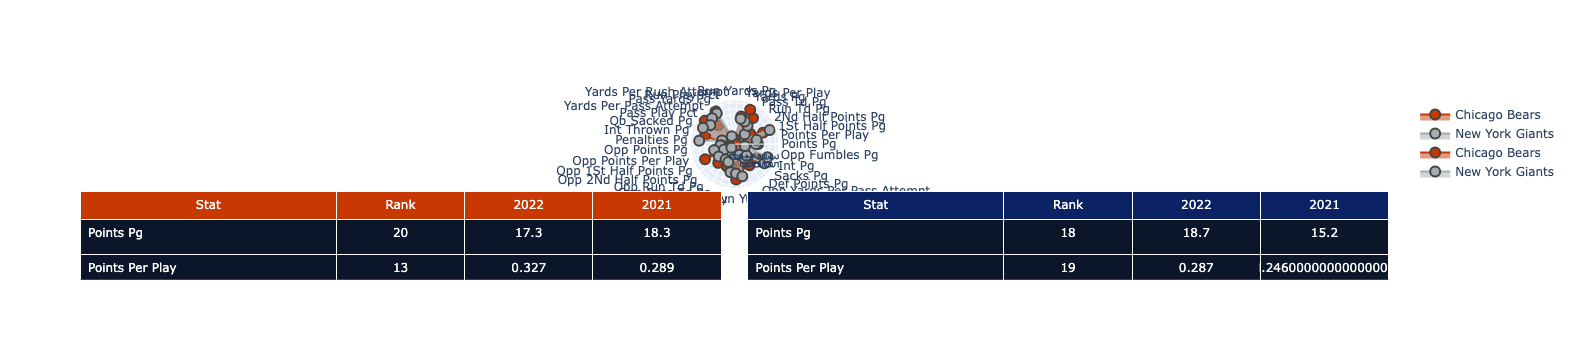

In [51]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


fig = make_subplots(rows=2, cols=2, horizontal_spacing=.02, vertical_spacing=.02,
                    specs=[[{"colspan": 2, "type":"scatterpolar"}, {}],
                    [{"type":"table"}, {"type":"table"}],
                    ]
                   )


sel_cols = ["Stat", "Rank", "2022", "2021"]

scat  = go.Scatterpolar(
    r=df_plot.Rank.tolist(),
    theta=df_plot.Stat.tolist(),
    fill='toself',
    name=team,
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primary_color, font_size=16, font_color=secondary_color),
    marker=dict(color=secondary_color, size=10,line=dict(width=2))
)
scat_opp  = go.Scatterpolar(
    r=df_plot_opp.Rank.tolist(),
    theta=df_plot_opp.Stat.tolist(),
    fill='toself',
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=opp_primary_color,font_size=16, font_color="#A5ACAF"),
    name=team_opp,
    marker=dict(color="#A5ACAF", size=10,line=dict(width=2))
)


scat_def  = go.Scatterpolar(
    r=df_plot_def.Rank.tolist(),
    theta=df_plot_def.Stat.tolist(),
    fill='toself',
    name=team,
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primary_color, font_size=16, font_color=secondary_color),
    marker=dict(color=secondary_color, size=10,line=dict(width=2))
)
scat_opp_def  = go.Scatterpolar(
    r=df_plot_opp_def.Rank.tolist(),
    theta=df_plot_opp_def.Stat.tolist(),
    fill='toself',
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=opp_primary_color,font_size=16, font_color="#A5ACAF"),
    name=team_opp,
    marker=dict(color="#A5ACAF", size=10,line=dict(width=2))
)


table = go.Table(header=dict(values=df_plot[sel_cols].columns, fill_color=secondary_color, font_color="white"), 
                columnwidth=[.40, .2, .2, .2],
                 cells=dict(values=df_plot[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                            height=35, 
                            align=["left", "center"])
                )


table_opp = go.Table(header=dict(values=df_plot_opp[sel_cols].columns, fill_color=opp_primary_color, font_color="white"),
                     columnwidth=[.40, .2, .2, .2],
                     cells=dict(values=df_plot_opp[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                                height=35, 
                                align=["left", "center"])
                    )

table_def = go.Table(header=dict(values=df_plot_def[sel_cols].columns, fill_color=secondary_color, font_color="white"), 
                columnwidth=[.40, .2, .2, .2],
                 cells=dict(values=df_plot[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                            height=35, 
                            align=["left", "center"])
                )


table_opp_def = go.Table(header=dict(values=df_plot_opp_def[sel_cols].columns, fill_color=opp_primary_color, font_color="white"),
                     columnwidth=[.40, .2, .2, .2],
                     cells=dict(values=df_plot_opp[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                                height=35, 
                                align=["left", "center"])
                    )


fig.add_trace(scat)
fig.add_trace(scat_opp)

fig.add_trace(scat_def)
fig.add_trace(scat_opp_def)

fig.add_trace(table, row=2, col=1)
fig.add_trace(table_opp, row=2, col=2)

fig.add_trace(table_def, row=2, col=1)
fig.add_trace(table_opp_def, row=2, col=2)

In [54]:
updatemenus = [{'buttons': [{'method': 'update',
  'label': 'Offense',
  'visible': True,
  'args': [{'visible': [True, True, False, False, True, True, False, False]}]},
 {'method': 'update',
  'label': 'Defense',
  'visible': True,
  'args': [{'visible': [False, False, True, True, False, False, False, True]}]}
                           ],
                                'direction': 'down',
                'showactive': True}]


In [44]:
updatemenus = [{'buttons': [{'method': 'restyle', 'label': 'Defense',
                             'args': [{"r":[df_plot_def.Rank.tolist(), df_plot_opp_def.Rank.tolist()], 
                                       "theta":[df_plot_def.Stat.tolist(), df_plot_opp_def.Stat.tolist()]
                                      },]
                            },
                            {'method': 'restyle', 'label': 'Offense',
                             'args': [{"r":[df_plot.Rank.tolist(), df_plot_opp.Rank.tolist()], 
                                       "theta":[df_plot.Stat.tolist(), df_plot_opp.Stat.tolist()]
                                      },]
                            }
                           ],
                'direction': 'down',
                'showactive': True}]

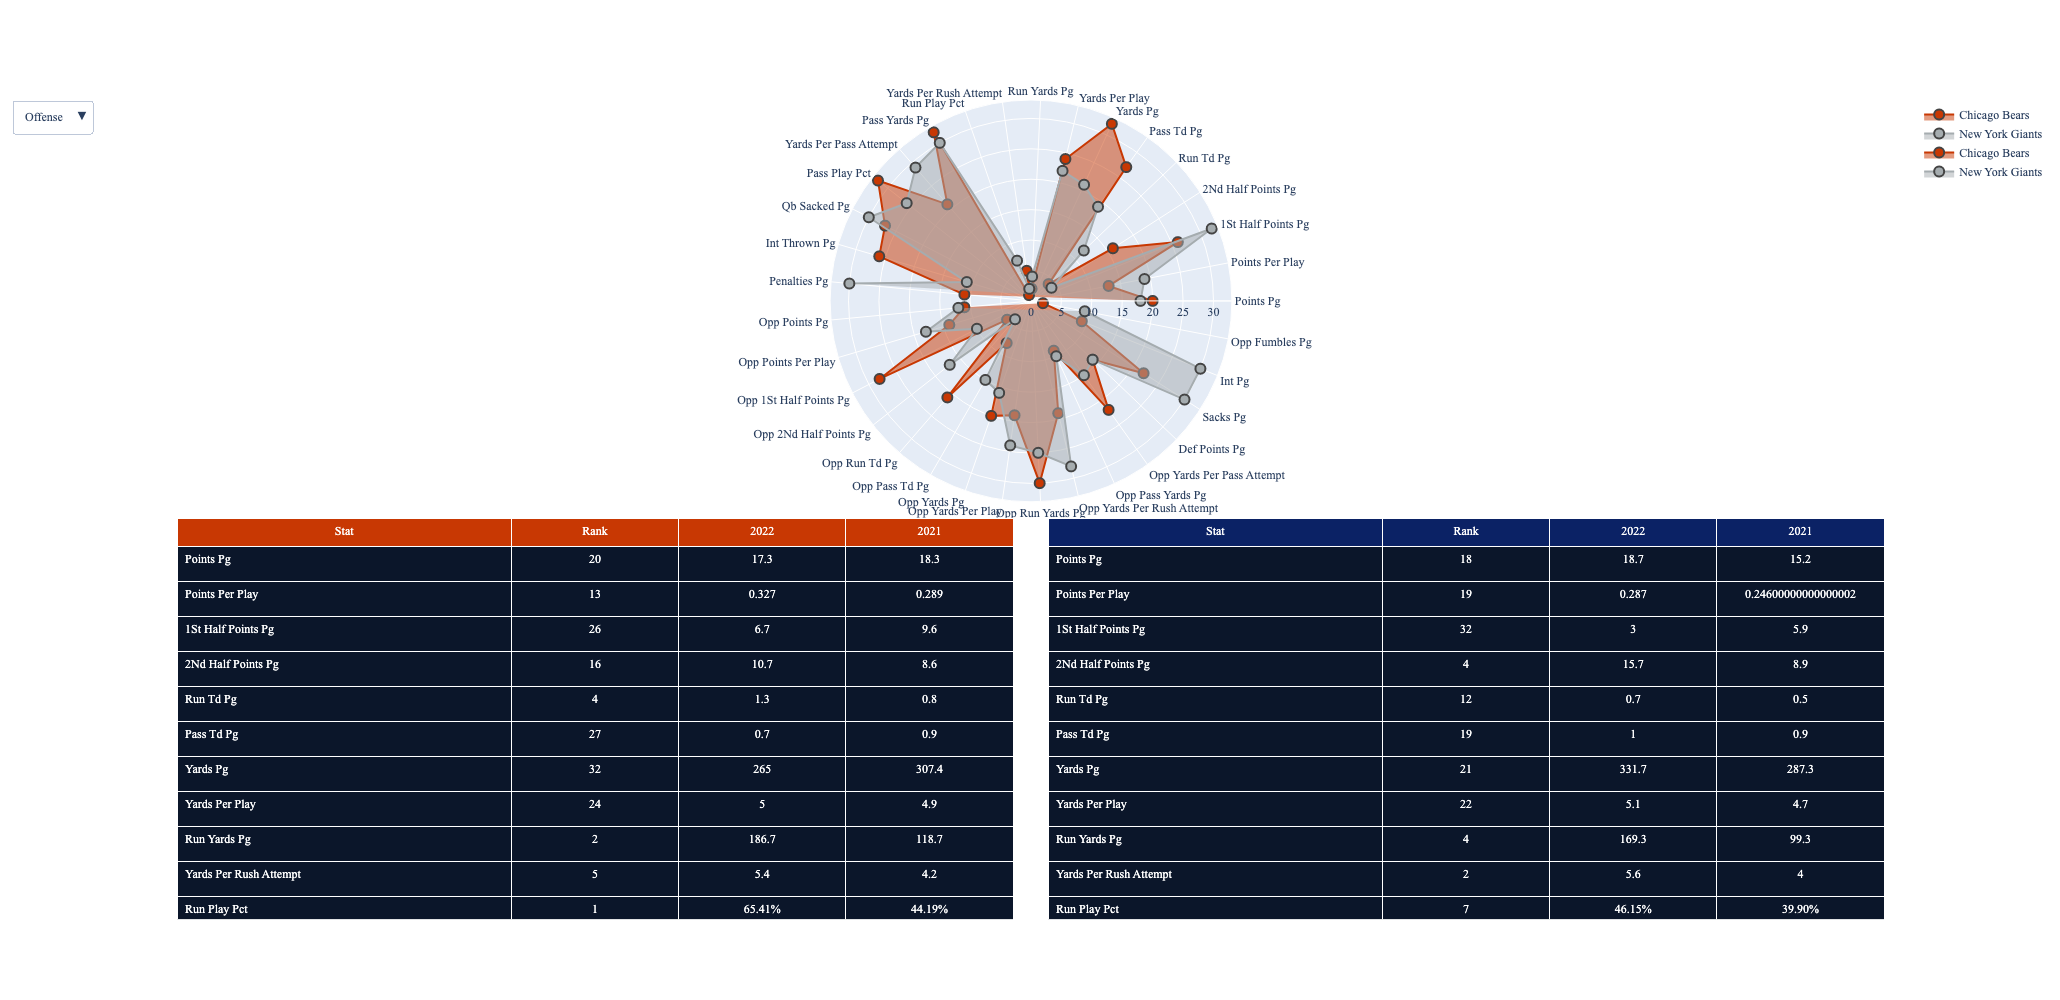

In [55]:
fig.update_layout(
    font_family="Times New Roman",
    updatemenus=updatemenus,
    height=1000
)

fig.show()
#{'title': {'text': f"<b>{team} {record_str} @{team_opp} {record_opp_str} Week {week} Matchup </b> - Defense"}}

In [1]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


fig = make_subplots(rows=2, cols=2, row_heights=[.40, .30], horizontal_spacing=.02, vertical_spacing=.02,
                    specs=[
                        [{"colspan": 2, "type":"scatterpolar"}, {}],
                        [{"type":"table"}, {"type":"table"}],
                    ]
                   )


sel_cols = ["Stat", "Rank", "2022", "2021"]

scat  = go.Scatterpolar(
    r=df_plot.Rank.tolist(),
    theta=df_plot.Stat.tolist(),
    fill='toself',
    name=team,
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primary_color, font_size=16, font_color=secondary_color),
    marker=dict(color=secondary_color, size=10,line=dict(width=2))
)
scat_opp  = go.Scatterpolar(
    r=df_plot_opp.Rank.tolist(),
    theta=df_plot_opp.Stat.tolist(),
    fill='toself',
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=opp_color,font_size=16, font_color="#A5ACAF"),
    name=team_opp,
    marker=dict(color="#A5ACAF", size=10,line=dict(width=2))
)


scat_def  = go.Scatterpolar(
    r=df_plot.Rank.tolist(),
    theta=df_plot.Stat.tolist(),
    fill='toself',
    name=team,
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primary_color, font_size=16, font_color=secondary_color),
    marker=dict(color=secondary_color, size=10,line=dict(width=2))
)
scat_opp_def  = go.Scatterpolar(
    r=df_plot_opp.Rank.tolist(),
    theta=df_plot_opp.Stat.tolist(),
    fill='toself',
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=opp_color,font_size=16, font_color="#A5ACAF"),
    name=team_opp,
    marker=dict(color="#A5ACAF", size=10,line=dict(width=2))
)


fig.append_trace([scat, scat_opp], row=1, col=1)
fig.append_trace([scat_def, scat_opp_def], row=1, col=1)

#fig.add_trace(table, row=2, col=1)
#fig.add_trace(table_opp, row=2, col=2)

fig.show()
#{'title': {'text': f"<b>{team} {record_str} @{team_opp} {record_opp_str} Week {week} Matchup </b> - Defense"}}


NameError: name 'make_subplots' is not defined

In [ ]:
def create_layout_button(customer):
    return dict(label = customer,
                method = 'restyle',
                args = [{'visible': [cust == customer for cust in list(df.Company.unique())],
                         'title': customer,
                         'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = [create_layout_button(customer) for customer in list(df.Company.unique())]
            )
        ])
    
    fig.show()